<a href="https://colab.research.google.com/github/sagihaider/Histopathological_OralCaner_Classification/blob/main/Oral_Cancer_SriV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ftmp4cvtmb-1.zip 

--2022-03-30 12:50:53--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ftmp4cvtmb-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.80.27
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.80.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098632250 (2.9G) [application/octet-stream]
Saving to: ‘ftmp4cvtmb-1.zip.1’

ftmp4cvtmb-1.zip.1  100%[===================>]   2.89G  30.2MB/s    in 99s     

2022-03-30 12:52:33 (29.8 MB/s) - ‘ftmp4cvtmb-1.zip.1’ saved [3098632250/3098632250]



In [3]:
import os
import glob
import shutil

os.rename('/content/ftmp4cvtmb-1.zip', '/content/data.zip')
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
base_dir = '/content/data_merged'
if not os.path.exists(base_dir): os.mkdir(base_dir)

normal_dir = os.path.join(base_dir, 'normal')
os.mkdir(normal_dir)

ocss_dir = os.path.join(base_dir, 'oscc')
os.mkdir(ocss_dir)

In [5]:
src_dir = "/content/First Set/100x Normal Oral Cavity Histopathological Images"
dst_dir = "/content/data_merged/normal"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/Second Set/400x Normal Oral Cavity Histopathological Images"
dst_dir = "/content/data_merged/normal"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/First Set/100x OSCC Histopathological Images"
dst_dir = "/content/data_merged/oscc"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

src_dir = "/content/First Set/400x OSCC Histopathological Images"
dst_dir = "/content/data_merged/oscc"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)


In [6]:
print('total training normal images:', len(os.listdir('/content/data_merged/normal/')))
print('total training oscc images:', len(os.listdir('/content/data_merged/oscc/')))

total training normal images: 290
total training oscc images: 439


In [7]:
import os
path='/content/data_merged/normal/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="normal" + str(count) + ".jpg"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/data_merged/oscc/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="oscc" + str(count) + ".jpg"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

In [8]:
# Initiate base directory
# shutil.rmtree('/content/CancerData')
final_dir = '/content/CancerData'
os.mkdir(final_dir)

In [9]:
# Create directories
train_dir = os.path.join(final_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(final_dir, 'validation')
os.mkdir(validation_dir)

# test_dir = os.path.join(final_dir, 'test')
# os.mkdir(test_dir)

train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

train_oscc_dir = os.path.join(train_dir, 'oscc')
os.mkdir(train_oscc_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_oscc_dir = os.path.join(validation_dir, 'oscc')
os.mkdir(validation_oscc_dir)

# test_normal_dir = os.path.join(test_dir, 'normal')
# os.mkdir(test_normal_dir)

# test_oscc_dir = os.path.join(test_dir, 'oscc')
# os.mkdir(test_oscc_dir)

In [10]:
original_dataset_dir_oscc = '/content/data_merged/oscc'
original_dataset_dir_normal = '/content/data_merged/normal'

import shutil
fnames = ['oscc{}.jpg'.format(i) for i in range(320)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_oscc, fname)
    dst = os.path.join(train_oscc_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['oscc{}.jpg'.format(i) for i in range(320, 420)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_oscc, fname)
    dst = os.path.join(validation_oscc_dir, fname)
    shutil.copyfile(src, dst)

# fnames = ['oscc{}.jpg'.format(i) for i in range(373, 439)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_oscc, fname)
#     dst = os.path.join(test_oscc_dir, fname)
#     shutil.copyfile(src, dst)

fnames = ['normal{}.jpg'.format(i) for i in range(200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_normal, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['normal{}.jpg'.format(i) for i in range(200, 280)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_normal, fname)
    dst = os.path.join(validation_normal_dir, fname)
    shutil.copyfile(src, dst)

# fnames = ['normal{}.jpg'.format(i) for i in range(246, 290)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_normal, fname)
#     dst = os.path.join(test_normal_dir, fname)
#     shutil.copyfile(src, dst)

In [11]:
print('total training oscc images:', len(os.listdir(train_oscc_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))

print('total validation oscc images:', len(os.listdir(validation_oscc_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))

# print('total test oscc images:', len(os.listdir(test_oscc_dir)))
# print('total test normal images:', len(os.listdir(test_normal_dir)))

total training oscc images: 320
total training normal images: 200
total validation oscc images: 100
total validation normal images: 80


In [12]:
# Create and Compile the Model
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
from keras.metrics import Precision, Recall, AUC

def compile_model(model):
  model.compile(loss='binary_crossentropy', 
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc', 'AUC','Recall','Precision'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 520 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [15]:
def fit_model(model):
  history = model.fit(train_generator,
                                steps_per_epoch=20,
                                epochs=10,
                                validation_data=validation_generator,
                                validation_steps=8)
  return history

In [16]:
import matplotlib.pyplot as plt

def plot_graph(history):
  acc = history.history['acc']
  auc = history.history['auc']
  precision = history.history['precision']
  recall = history.history['recall']

  val_acc = history.history['val_acc']
  val_auc = history.history['val_auc']
  val_precision = history.history['val_precision']
  val_recall = history.history['val_recall']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, label='acc')
  plt.plot(epochs, auc, label='auc')
  plt.plot(epochs, recall, label='recall')
  plt.plot(epochs, precision, label='precision')
  plt.title('Training metrics')
  plt.legend()
  plt.figure()

  plt.plot(epochs, val_acc, label='acc')
  plt.plot(epochs, val_auc, label='auc')
  plt.plot(epochs, val_recall, label='recall')
  plt.plot(epochs, val_precision, label='precision')
  plt.title('Validation metrics')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

Epoch 1/10
20/20 [==============================] - 66s 3s/step - loss: 0.6605 - acc: 0.6075 - auc: 0.5630 - recall: 0.8589 - precision: 0.6358 - val_loss: 0.6648 - val_acc: 0.5875 - val_auc: 0.6916 - val_recall: 1.0000 - val_precision: 0.5686
Epoch 2/10
20/20 [==============================] - 52s 3s/step - loss: 0.6163 - acc: 0.6750 - auc: 0.6712 - recall: 0.8715 - precision: 0.6889 - val_loss: 0.5991 - val_acc: 0.7250 - val_auc: 0.8044 - val_recall: 0.6136 - val_precision: 0.8438
Epoch 3/10
20/20 [==============================] - 50s 3s/step - loss: 0.5696 - acc: 0.7075 - auc: 0.7396 - recall: 0.8484 - precision: 0.7213 - val_loss: 0.5262 - val_acc: 0.7625 - val_auc: 0.8069 - val_recall: 0.9326 - val_precision: 0.7217
Epoch 4/10
20/20 [==============================] - 51s 3s/step - loss: 0.5566 - acc: 0.7400 - auc: 0.7518 - recall: 0.8484 - precision: 0.7555 - val_loss: 0.5654 - val_acc: 0.7250 - val_auc: 0.7811 - val_recall: 0.9535 - val_precision: 0.6721
Epoch 5/10
20/20 [======

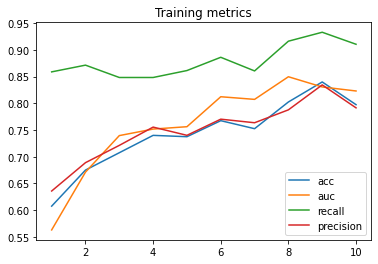

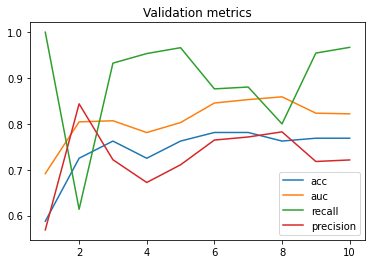

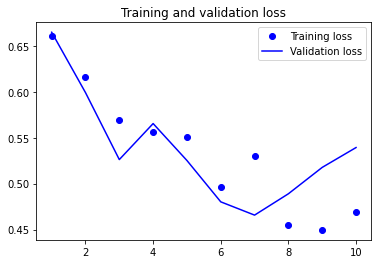

In [17]:
#dropout = 0.5
compile_model(model)
history = fit_model(model)
plot_graph(history)

In [18]:
model_25 = models.Sequential()
model_25.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_25.add(layers.MaxPooling2D((2, 2)))
model_25.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_25.add(layers.MaxPooling2D((2, 2)))
model_25.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_25.add(layers.MaxPooling2D((2, 2)))
model_25.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_25.add(layers.MaxPooling2D((2, 2)))
model_25.add(layers.Flatten())
model_25.add(layers.Dropout(0.25))
model_25.add(layers.Dense(512, activation='relu'))
model_25.add(layers.Dense(1, activation='sigmoid'))
model_25.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

Epoch 1/10
20/20 [==============================] - 55s 3s/step - loss: 0.6811 - acc: 0.5950 - auc: 0.4903 - recall: 0.9424 - precision: 0.6074 - val_loss: 0.6804 - val_acc: 0.4875 - val_auc: 0.8641 - val_recall: 0.0575 - val_precision: 1.0000
Epoch 2/10
20/20 [==============================] - 51s 3s/step - loss: 0.6319 - acc: 0.6625 - auc: 0.6577 - recall: 0.8400 - precision: 0.6885 - val_loss: 0.6168 - val_acc: 0.6875 - val_auc: 0.7472 - val_recall: 0.9890 - val_precision: 0.6475
Epoch 3/10
20/20 [==============================] - 51s 3s/step - loss: 0.6075 - acc: 0.6475 - auc: 0.7089 - recall: 0.7787 - precision: 0.6859 - val_loss: 0.5543 - val_acc: 0.7750 - val_auc: 0.8473 - val_recall: 0.9302 - val_precision: 0.7273
Epoch 4/10
20/20 [==============================] - 51s 3s/step - loss: 0.5965 - acc: 0.6875 - auc: 0.7207 - recall: 0.7869 - precision: 0.7245 - val_loss: 0.8068 - val_acc: 0.6375 - val_auc: 0.7079 - val_recall: 0.9890 - val_precision: 0.6122
Epoch 5/10
20/20 [======

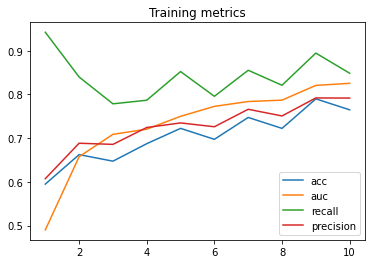

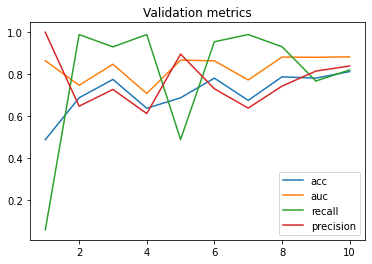

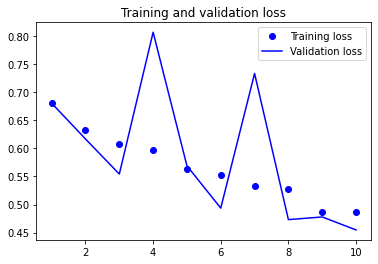

In [19]:
#dropout = 0.25
compile_model(model_25)
history_25 = fit_model(model_25)
plot_graph(history_25)

In [20]:
model_75 = models.Sequential()
model_75.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_75.add(layers.MaxPooling2D((2, 2)))
model_75.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_75.add(layers.MaxPooling2D((2, 2)))
model_75.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_75.add(layers.MaxPooling2D((2, 2)))
model_75.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_75.add(layers.MaxPooling2D((2, 2)))
model_75.add(layers.Flatten())
model_75.add(layers.Dropout(0.75))
model_75.add(layers.Dense(512, activation='relu'))
model_75.add(layers.Dense(1, activation='sigmoid'))
model_75.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

Epoch 1/10
20/20 [==============================] - 55s 3s/step - loss: 0.6732 - acc: 0.6425 - auc: 0.4804 - recall: 0.9883 - precision: 0.6438 - val_loss: 0.6823 - val_acc: 0.5625 - val_auc: 0.5356 - val_recall: 1.0000 - val_precision: 0.5625
Epoch 2/10
20/20 [==============================] - 52s 3s/step - loss: 0.6587 - acc: 0.6300 - auc: 0.5439 - recall: 0.9640 - precision: 0.6342 - val_loss: 0.6616 - val_acc: 0.5688 - val_auc: 0.6950 - val_recall: 1.0000 - val_precision: 0.5605
Epoch 3/10
20/20 [==============================] - 51s 3s/step - loss: 0.6341 - acc: 0.6925 - auc: 0.6776 - recall: 0.9582 - precision: 0.6696 - val_loss: 0.6181 - val_acc: 0.7563 - val_auc: 0.7770 - val_recall: 0.9101 - val_precision: 0.7232
Epoch 4/10
20/20 [==============================] - 51s 3s/step - loss: 0.6261 - acc: 0.6675 - auc: 0.6799 - recall: 0.8601 - precision: 0.6786 - val_loss: 0.5867 - val_acc: 0.7250 - val_auc: 0.7755 - val_recall: 0.9890 - val_precision: 0.6767
Epoch 5/10
20/20 [======

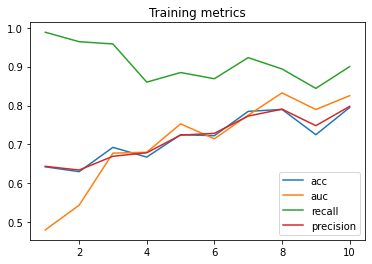

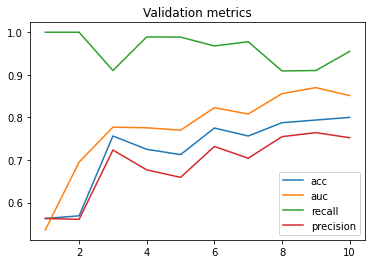

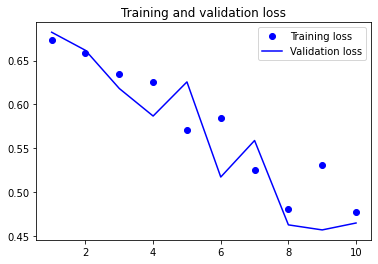

In [21]:
#dropout = 0.75
compile_model(model_75)
history_75 = fit_model(model_75)
plot_graph(history_75)